# Ensemble methods
## Szymon szewczyk

### Single Classifier vs Bagging vs Boosting

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [113]:
data = load_wine()
X = data['data']
y = data['target']
columns = data['feature_names']

X_df = pd.DataFrame(data=X, columns=columns)
Y_df = pd.DataFrame(data=y, columns=['target'])

wine_df = pd.concat([X_df, Y_df], axis=1)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [114]:
wine_df['target'].unique()

array([0, 1, 2])

In [115]:
dec_tree = DecisionTreeClassifier(min_samples_leaf=3, random_state=1)
cross_dec = cross_val_score(dec_tree, X, y)
cross_dec_mean = np.mean(cross_dec)

bag_tree = BaggingClassifier(n_estimators=50, random_state=1)
cross_bag = cross_val_score(bag_tree, X, y)
cross_bag_mean = np.mean(cross_bag)

ada_class = AdaBoostClassifier(n_estimators=50, algorithm='SAMME', random_state=1)
cross_ada = cross_val_score(ada_class, X, y)
cross_ada_mean = np.mean(cross_ada)

grad_class = GradientBoostingClassifier(n_estimators=50, max_depth=1, learning_rate=1.0, subsample=0.5, random_state=1)
cross_grad = cross_val_score(grad_class, X, y)
cross_grad_mean = np.mean(cross_grad)

In [116]:
print("Decision tree score: {}; avg={}\nBagging score: {}; avg={}\nAdaBoost score: {}; avg={}\nGradient boosting score: {}; avg={}".format(cross_dec,cross_dec_mean, cross_bag, cross_bag_mean, cross_ada, cross_ada_mean, cross_grad, cross_grad_mean))

Decision tree score: [0.94444444 0.80555556 0.80555556 0.91428571 0.97142857]; avg=0.8882539682539681
Bagging score: [0.94444444 0.94444444 0.94444444 0.97142857 1.        ]; avg=0.9609523809523809
AdaBoost score: [0.83333333 0.91666667 0.91666667 1.         1.        ]; avg=0.9333333333333332
Gradient boosting score: [0.88888889 0.94444444 0.97222222 0.97142857 1.        ]; avg=0.9553968253968254


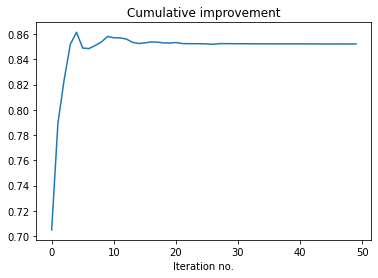

In [117]:
gc = grad_class.fit(X,y)
cum_improvement = np.cumsum(gc.oob_improvement_)
plt.plot(range(len(cum_improvement)), cum_improvement)
plt.title("Cumulative improvement")
plt.xlabel("Iteration no.")
plt.show()